In [25]:
!pip install mplcursors


     ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
     ------------- ------------------------ 30.7/89.0 kB 435.7 kB/s eta 0:00:01
     ---------------------------------------- 89.0/89.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21201 sha256=aee4d32589fdcbe29a1a31722a25e0f1df57fda359ddb2c72b6097e509415c0b
  Stored in directory: c:\users\melan\appdata\local\pip\cache\wheels\5d\a1\eb\b98ee80431eb8217a22381e1725048be8cd0385675b151be45
Successfully built mplcursors


In [26]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

In [40]:
# Specifica il file csv
file_path = r'C:\Users\melan\OneDrive\Documenti\GitHub\dscoding-projects\melany.gomez\myproject\temperature\GlobalLandTemperaturesByMajorCity.csv'

# leggi il file cvs
df = pd.read_csv(file_path)


In [41]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [9]:
import matplotlib.pyplot as plt


In [42]:
print(df.head())


           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


In [43]:
print(df.columns)


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [51]:
# elimina valori NaN
df = df.dropna()

df = df.rename(columns={'dt': 'date'})

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# riordina DataFrame,'dt' in ordine discendente
df = df.sort_values(by='date', ascending=False)
print(df[df['Country'] == 'China'])

             date  AverageTemperature  AverageTemperatureUncertainty  \
79199  2013-08-01              28.700                          0.864   
239175 2013-08-01              24.528                          0.840   
83482  2013-08-01              22.322                          0.290   
178563 2013-08-01              27.054                          0.233   
49354  2013-08-01              23.113                          0.369   
...           ...                 ...                            ...   
236859 1820-08-01              20.683                          2.218   
81166  1820-08-01              19.210                          2.308   
220711 1820-08-01              18.194                          2.231   
47038  1820-08-01              19.674                          2.283   
225347 1820-08-01              22.822                          2.218   

             City Country Latitude Longitude  
79199   Guangzhou   China   23.31N   112.72E  
239175       Xian   China   34.56N   108.

In [52]:
# Imprimir el DataFrame
df

,date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
203038,2013-09-01,28.315,1.126,Santo Domingo,Dominican Republic,18.48N,69.30W
54912,2013-09-01,19.977,1.033,Chicago,United States,42.59N,87.27W
133822,2013-09-01,23.301,0.984,Los Angeles,United States,34.56N,118.70W
155195,2013-09-01,14.281,1.110,Montreal,Canada,45.81N,72.69W
149991,2013-09-01,18.313,1.231,Mexico,Mexico,20.09N,98.96W
...,...,...,...,...,...,...,...
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
169769,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
155196,1743-11-01,-2.570,2.037,Moscow,Russia,55.45N,36.85E
188021,1743-11-01,8.248,1.917,Rome,Italy,42.59N,13.09E


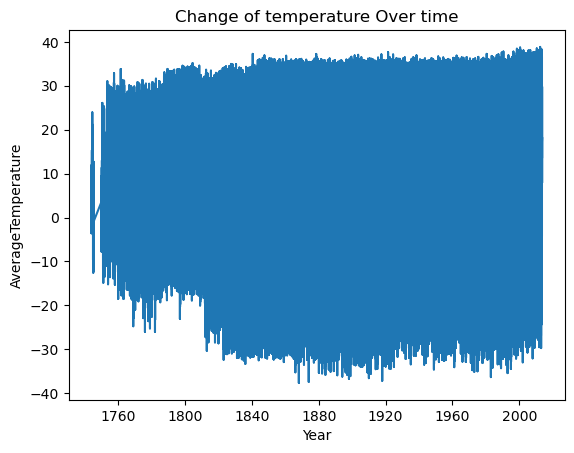

In [27]:
df = df.rename(columns={'dt': 'date'})
plt.plot(df['date'], df['AverageTemperature'])
plt.xlabel('Year')
plt.ylabel('AverageTemperature')
plt.title('Change of temperature Over time')
mplcursors.cursor(hover=True)

plt.show()

In [61]:
def latitude(x):
    if (x[len(x) - 1] == 'N'):
        i = float(x[:len(x) - 1])
    else:
        i = -float(x[:len(x) - 1])
    return i


def longitude(x):
    if (x[len(x) - 1] == 'E'):
        i = float(x[:len(x) - 1])
    else:
        i = -float(x[:len(x) - 1])
    return i

SyntaxError: invalid non-printable character U+00A0 (3091620426.py, line 14)

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplcursors

# Assuming 'df' is your DataFrame with 'longitude', 'latitude', and 'Temperature' columns
# If your column names are different, replace them accordingly.

# Create a GeoDataFrame from a DataFrame
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the data
gdf.plot(column='AverageTemperature', cmap='coolwarm', legend=True, legend_kwds={'label': "Temperature"})
plt.title('Change of Temperature over time')

# Add interactive cursors
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Temperatura: {sel.target[0]:.2f}"))

# Show the plot
plt.show()


ValueError: could not convert string to float: '69.30W'

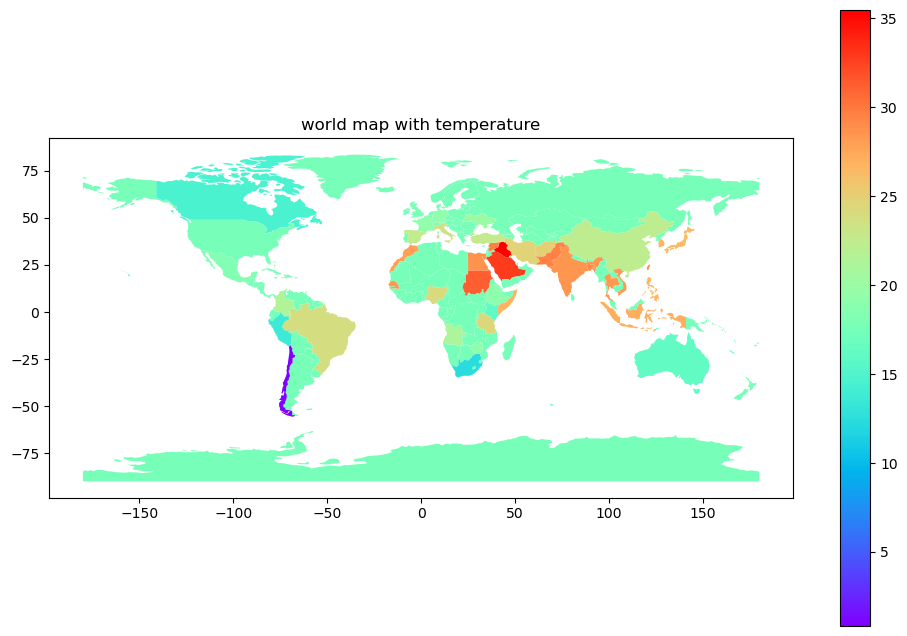

In [44]:
# Creare mappa, colori random 
actual_world.plot(column='AverageTemperature', cmap='rainbow', legend=True, figsize=(12, 8))

# titolo
plt.title('world map with temperature')


plt.show()

C:\Users\melan\AppData\Local\Temp\ipykernel_14360\54179283.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

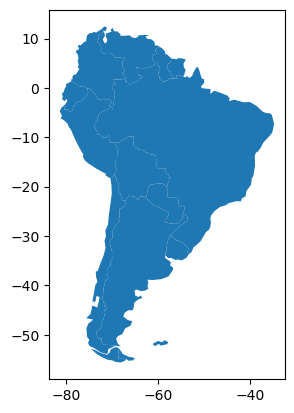

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
south_america = world[world['continent'] == 'South America']
south_america.plot()


C:\Users\melan\AppData\Local\Temp\ipykernel_14360\4174706483.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


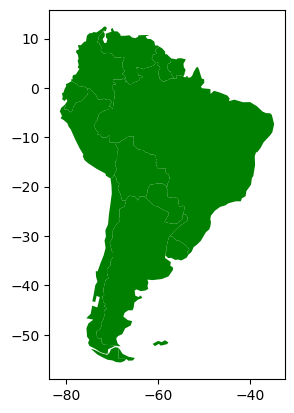

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter South America
south_america = world[world['continent'] == 'South America']

# Plot South America
south_america.plot(color="green")

# Show the plot
plt.show()
